In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [2]:
clusters = pd.read_csv('csomclusters.csv').iloc[:,1:]
clusters.columns = ['gmm','gmm prob1','gmm prob0','gmm prob2','kmeans']

In [3]:
res=pd.read_csv('res.csv')

In [4]:
data = pd.concat([res,clusters],axis=1)
data['gmm'] = data['gmm'].map({0:10,1:11,2:2})
data['gmm'] = data['gmm'].map({10:1,11:0,2:2})

k_features=data[['SW','phie','GR','RHOB','ILD','kmeans']]
g_features=data[['SW','phie','GR','RHOB','ILD','gmm']]
kmeans = data['kmeans']
gmm = data['gmm']

In [5]:
#cluster stats
kmeans_c = data['kmeans'].sort_values().unique()
k_stat=[0]*len(kmeans_c)
for i,k in enumerate(kmeans_c):
    slc=data.loc[data['kmeans'] == k][['SW', 'phie', 'GR', 'ILD', 'RHOB']]
    k_stat[i]=slc.describe()
k_stat=pd.concat(k_stat[:])

gmm_c = data['gmm'].sort_values().unique()
gmm_stat=[0]*len(gmm_c)
for i,k in enumerate(gmm_c):
    slc=data.loc[data['gmm'] == k][['SW', 'phie', 'GR', 'ILD', 'RHOB']]
    gmm_stat[i]=slc.describe()
gmm_stat=pd.concat(gmm_stat[:])
gmm_stat.to_csv('gmm_stat.csv')
k_stat.to_csv('kmeans_stat.csv')

In [6]:
gmm_stat

,SW,phie,GR,ILD,RHOB
count,219425.000000,219425.000000,219425.000000,219425.000000,219425.000000
mean,0.709877,0.164498,51.964819,3.434264,2453.547924
std,0.137147,0.044120,26.644329,7.961060,77.379815
min,0.210610,0.011900,10.300000,0.528900,2145.598600
25%,0.614110,0.136000,30.670000,1.373800,2394.089400
50%,0.719570,0.172100,46.970000,1.801900,2443.806400
75%,0.805630,0.196300,64.580000,3.058800,2518.490700
max,1.000000,0.305600,150.480000,748.365700,2666.426000
count,123262.000000,123262.000000,123262.000000,123262.000000,123262.000000
mean,0.352410,0.238887,38.361758,451.010622,2322.954329


In [7]:
k_stat

,SW,phie,GR,ILD,RHOB
count,158179.000000,158179.000000,158179.000000,158179.000000,158179.000000
mean,0.716819,0.161882,41.294249,3.525562,2479.418123
std,0.137140,0.044463,14.893958,6.679960,67.778874
min,0.265390,0.011900,10.300000,0.528900,2221.371800
25%,0.620805,0.132600,27.960000,1.424300,2425.968900
50%,0.729300,0.168300,41.170000,1.948000,2478.286100
75%,0.812975,0.194000,51.710000,3.316200,2533.187500
max,1.000000,0.303900,111.180000,643.259500,2666.426000
count,191565.000000,191565.000000,191565.000000,191565.000000,191565.000000
mean,0.463549,0.214752,54.025963,291.382518,2347.234262


In [8]:
n_to_plot=20000
njump=int(len(res)/n_to_plot)

SW and phie percentiles N/G

In [24]:
percs=[50,75,90]
perc_ngs=[0]*len(percs)
for i,per in enumerate(percs):
    sws = data['SW']
    phs = data['phie']
    cut_sw = np.percentile(data['SW'],(100-per))
    cut_ph = np.percentile(data['phie'],per)
    bool_sw = sws < cut_sw
    bool_ph = phs > cut_ph
    ng_bool = ((bool_ph == True) & (bool_sw==True))*1
    data['NG perc '+str(per)] = ng_bool
    

In [25]:
data.to_csv('ng_classes.csv')

In [26]:
from mpl_toolkits.mplot3d import Axes3D

In [36]:
data['i']=abs(data['i']-(np.max(data['i'])))

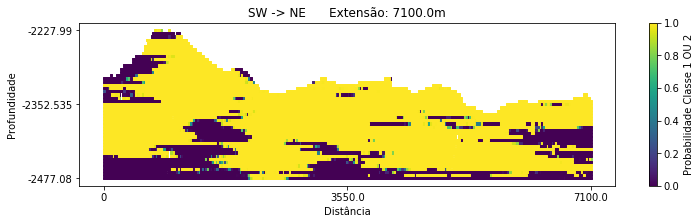

In [253]:
cmap = plt.get_cmap('magma', 3)
j_slice=int((np.max(data['j']))/2)
j_slice_data=data.loc[data['j'] == j_slice]
xplot = j_slice_data['i']
yplot = j_slice_data['k']
plt.figure(figsize=(12,3),facecolor='white')
plt.scatter(xplot,yplot,c=1-j_slice_data['gmm prob0'],marker='s',cmap='viridis',s=5)
plt.colorbar(label='Probabilidade Classe 1 OU 2')
plt.ylabel('Profundidade')
plt.xlabel('Distância')
d = round(np.sqrt(((np.max(j_slice_data['X'])-np.min(j_slice_data['X']))**2) + ((np.max(j_slice_data['Y'])-np.min(j_slice_data['Y']))**2)),ndigits=0)
plt.title('SW -> NE      Extensão: '+str(d)+'m')
plt.xticks(ticks=[np.min(j_slice_data['i']), np.max(j_slice_data['i'])/2,np.max(j_slice_data['i'])],labels=[0,d/2,d])
plt.yticks(ticks=[np.min(j_slice_data['k']), np.min(j_slice_data['k'])+((np.max(j_slice_data['k'])-np.min(j_slice_data['k']))/2) ,np.max(j_slice_data['k'])],labels=[np.min(j_slice_data['Z']), np.min(j_slice_data['Z'])+((np.max(j_slice_data['Z'])-np.min(j_slice_data['Z']))/2) ,np.max(j_slice_data['Z'])])
plt.show()

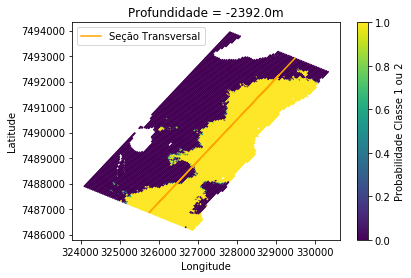

In [255]:
k_slice=int(np.median(data['k'])/1)
k_slice_data=data.loc[data['k'] == k_slice]
xplot = k_slice_data['X']
yplot = k_slice_data['Y']
zplot = 1-k_slice_data['gmm prob0']
plt.figure(facecolor='white')
plt.scatter(xplot,yplot,c=zplot,marker='.',cmap='viridis',s=3)
plt.colorbar(label='Probabilidade Classe 1 ou 2')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Profundidade = '+str(round(np.mean(k_slice_data['Z']),ndigits=0))+"m")
line=k_slice_data.loc[k_slice_data['j'] == j_slice]
plt.plot(line['X'],line['Y'],c='orange',label='Seção Transversal')
plt.legend()
plt.show()
